### `Here, we'll select the most impactful features instead of transforming them with PCA.`

### `1. Feature Importance (Random Forest)`

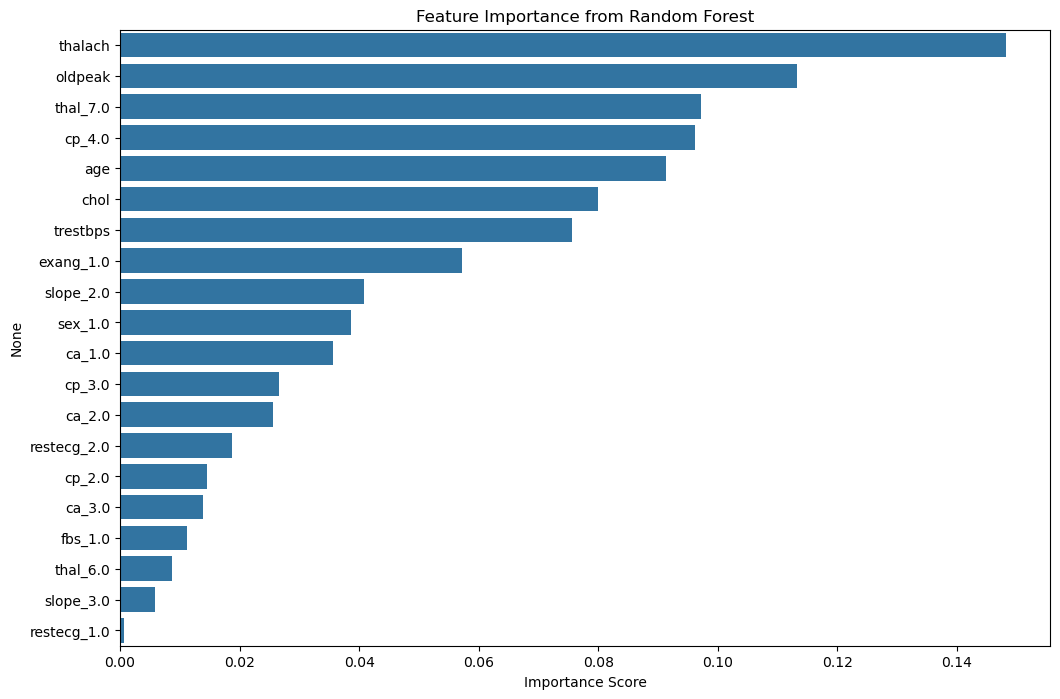

In [4]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the cleaned data
df = pd.read_csv('../data/cleaned_heart_disease.csv')
X = df.drop('target', axis=1)
y = df['target']

# Train a Random Forest to get feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Create a series for feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.show()

### `2. Recursive Feature Elimination (RFE)`
RFE recursively removes the least important features.

In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Use Logistic Regression as the estimator for RFE
logreg = LogisticRegression(max_iter=1000)

# Select the top 10 features
rfe = RFE(estimator=logreg, n_features_to_select=10)
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected features from RFE:", selected_features)

Selected features from RFE: Index(['oldpeak', 'sex_1.0', 'cp_2.0', 'cp_4.0', 'exang_1.0', 'slope_2.0',
       'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_7.0'],
      dtype='object')


### `3. Chi-Square Test`
This test applies to non-negative features (so we use the pre-encoded, pre-scaled data for this). It's best for checking the relationship between categorical features and the target.

In [6]:
# Select the top N features based on importance scores
final_features = importances.index[:12] 
X_selected = X[final_features]

# Create a new DataFrame with selected features and the target
df_selected = pd.concat([X_selected, y], axis=1)
df_selected.to_csv('../data/final_heart_disease_dataset.csv', index=False)